In [2]:
import torch
from config_loader import load_config, get_model_name
from datasets import load_dataset
#from plotting import plot_conditioned_examples

config = load_config("VAE_16")
# Load dataset
train_loader, val_loader, test_loader, image_shape = load_dataset(config["data_params"])

model_name = get_model_name(config)
#plot_conditioned_examples(next(iter(train_loader))[0][0])


In [ ]:
from lightning_extensions import ExtendedTrainer
from modules import VAEModule

model = VAEModule(config['model_params'], image_shape=image_shape, model_name=config['model_name'])

trainer = ExtendedTrainer(project_name="MTVAEs", **config['trainer_params'], model_name=model_name)
trainer.fit(model, train_loader, val_loader)
#save
trainer.save_model_checkpoint()

torch.Size([1, 28, 28])


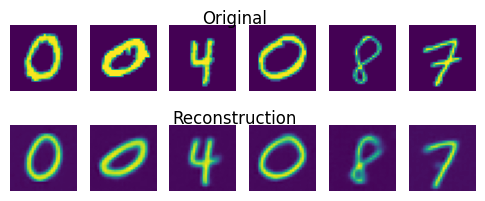

Model is None or latent dim is not 2 or model has no decoder


In [4]:
from modules import VAEModule
model = VAEModule.load_model_checkpoint(model_name = model_name)
model.eval()
from plotting import plot_stage_one_results
# plot some samples and their reconstruction

plot_stage_one_results(model, test_loader)

# print 5 images from test set